In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('notebook_repr_html',True)

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

/Users/fgonza/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Convolutional Neural Networks in Keras

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## CIFAR-10  Dataset

* Collected by [Krizhevsky et al.](https://www.cs.toronto.edu/~kriz/cifar.html)
* Labeled subsets of the 80 million tiny images dataset (http://people.csail.mit.edu/torralba/tinyimages/)
* 60000 32x32 colour images in 10 classes (6000 images per class). 
* 50000 training images and 10000 test images. 

## CIFAR-10  Dataset

<img  src="cifar.png" width="500">

## Loading the dataset

Using Theano backend.


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
deer


/Users/fgonza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


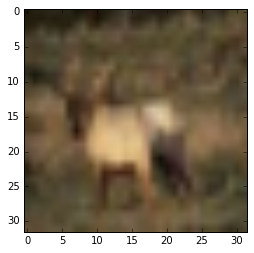

In [2]:
from __future__ import print_function
from keras.datasets import cifar10
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']
plt.imshow(X_train[3])
print(LABELS[y_train[3]])

## Loading a pretrained model

In [22]:
from keras.models import load_model

model = load_model('100ep_cifar100d.h5')
model.summary(70)

______________________________________________________________________
Layer (type)           Output Shape   Param # Connected to            
convolution2d_1 (Convol(None, 32, 32, 896     convolution2d_input_6[0]
______________________________________________________________________
activation_1 (Activatio(None, 32, 32, 0       convolution2d_1[0][0]   
______________________________________________________________________
convolution2d_2 (Convol(None, 30, 30, 9248    activation_1[0][0]      
______________________________________________________________________
activation_2 (Activatio(None, 30, 30, 0       convolution2d_2[0][0]   
______________________________________________________________________
maxpooling2d_1 (MaxPool(None, 15, 15, 0       activation_2[0][0]      
______________________________________________________________________
dropout_1 (Dropout)    (None, 15, 15, 0       maxpooling2d_1[0][0]    
______________________________________________________________________
convol

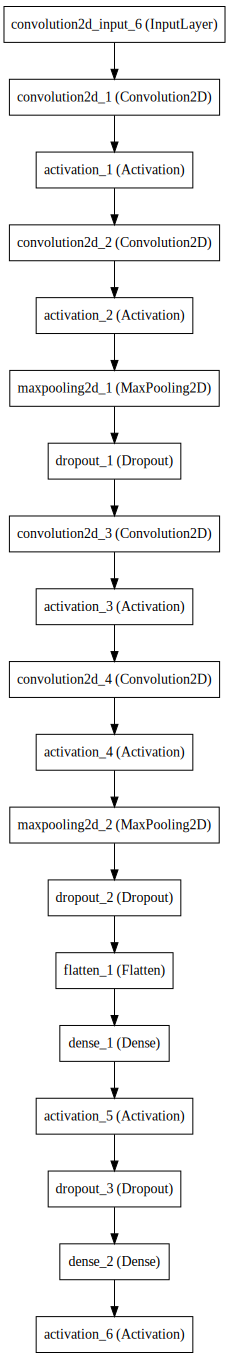

In [23]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Classification of new images

array([[  9.58712578e-01,   4.12805937e-02,   4.25642023e-16,
          2.28945693e-17,   0.00000000e+00,   9.31706128e-27,
          1.83570099e-42,   7.06466078e-37,   6.80738185e-06,
          2.98203217e-16]], dtype=float32)

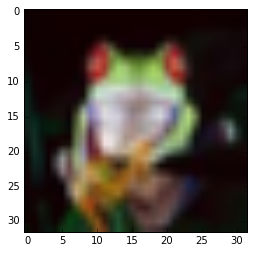

In [24]:
idx = 102
plt.imshow(X_test[idx])
model.predict_proba(X_test[idx:idx+1], verbose=0)

In [25]:
from keras import backend as K
def get_layer_values(model, layer, in_val):
    return K.function([model.layers[0].input, K.learning_phase()],
                      [model.layers[layer].output])([[in_val], 0])[0][0]

## Most likely labels

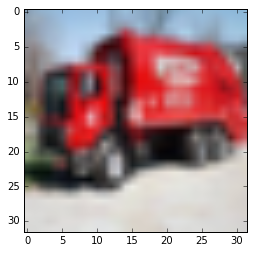

[(253.50624, 'automobile'),
 (243.90128, 'truck'),
 (123.67048, 'airplane'),
 (33.779324, 'ship'),
 (-26.27223, 'dog'),
 (-27.27042, 'horse'),
 (-63.655201, 'cat'),
 (-66.879021, 'bird'),
 (-235.08624, 'frog'),
 (-262.78152, 'deer')]

In [26]:
idx = 133
plt.imshow(X_test[idx])
plt.show()
activations = get_layer_values(model, 16, X_test[idx])
vals = [(activations[i], LABELS[i]) for i in range(10)]
sorted(vals, reverse=True)

## How does the network see?

In [27]:

def visualize_weights(model, layer, shape=(4, 8)):
    values = model.layers[layer].get_weights()[0]
    filters = values.shape[3]
    plt.figure(figsize=(9, 9./shape[1]*shape[0]))
    for i in range(filters):
        plt.subplot(shape[0], shape[1], i + 1)
        plt.imshow(values[:,:,0,i], cmap=plt.get_cmap('gray'))
        plt.axis("off")
    plt.show()

def visualize_layer(model, layer, in_val, shape=(8,4)):
    values = get_layer_values(model, layer, in_val)
    filters = values.shape[2]
    plt.figure(figsize=(9, 9./shape[1]*shape[0]))
    for i in range(filters):
        plt.subplot(shape[0], shape[1], i + 1)
        plt.imshow(values[:,:,i])
        plt.axis("off")
    plt.show()
        

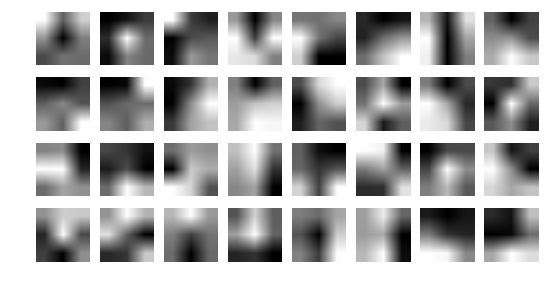

In [28]:
visualize_weights(model, 0)

## Internal representation (layer 1)

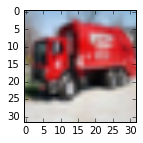

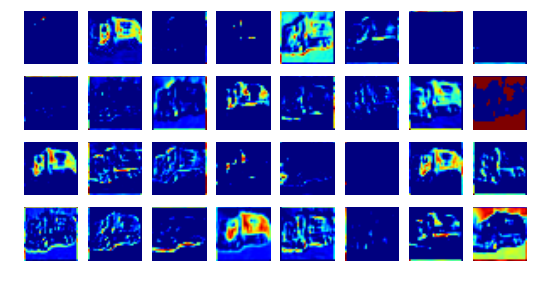

In [29]:
idx = 133
plt.figure(figsize=(2,2)); plt.imshow(X_test[idx]); plt.show()
visualize_layer(model, 1, X_test[idx],shape=(4,8))

## Internal representation (layer 3)

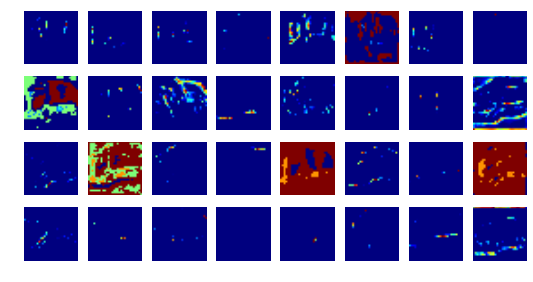

In [30]:
visualize_layer(model, 3, X_test[idx],shape=(4, 8))

## Internal representation (layer 7)

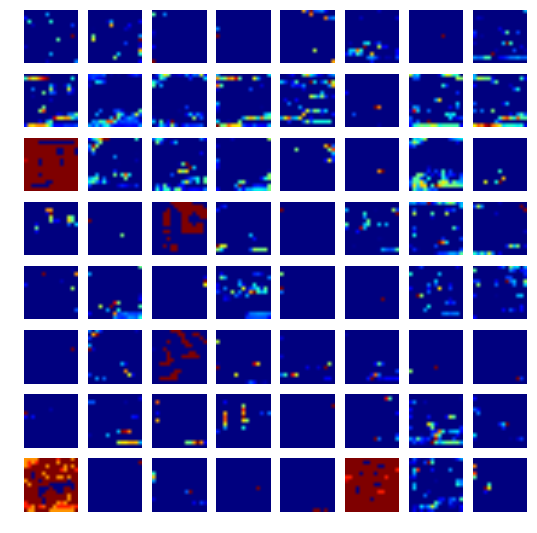

In [31]:
visualize_layer(model, 7, X_test[idx],shape=(8,8))

## Internal representation (layer 9)

In [ ]:
visualize_layer(model, 9, X_test[idx],shape=(8,8))